In [1]:
"""
INAFU6503: Applying Machine Learning
Problem Set 1: Clustering
Professor Daniel Bjorkegren
Columbia University

This file is a version of PS1 with more guidance. If you find the following
stencil code to be too easy to solve the problems and would like a bit more
challenge, please use the "protein_starter.py".

Throughout this file, complete where it says "TODO" appropriately to execute
your tasks.
"""


'\nINAFU6503: Applying Machine Learning\nProblem Set 1: Clustering\nProfessor Daniel Bjorkegren\nColumbia University\n\nThis file is a version of PS1 with more guidance. If you find the following\nstencil code to be too easy to solve the problems and would like a bit more\nchallenge, please use the "protein_starter.py".\n\nThroughout this file, complete where it says "TODO" appropriately to execute\nyour tasks.\n'

In [2]:
import numpy as np
import csv

In [3]:
# ------------------ Initialize variables ---------------------
all_countries = []
X = []

# change your protein values accordingly if necessary
proteins = ["RedMeat", "WhiteMeat", "Eggs", "Milk"]


In [4]:
# ------------------- READ IN DATA ----------------------------------
with open("protein.csv", "rt", encoding="utf8") as data_file:
    reader = csv.reader(data_file)
    headers = [header.strip() for header in next(reader)]

    dictReader = csv.DictReader(data_file, fieldnames=headers)

    for dRow in dictReader:
        all_countries.append(dRow["Country"])
        X.append([float(dRow[pro]) for pro in proteins])

all_countries = np.array(all_countries)
X = np.array(X)
N = len(X)
X_raw = X
X = X[:, :2]

In [5]:
X

array([[10.1,  1.4],
       [ 8.9, 14. ],
       [13.5,  9.3],
       [ 7.8,  6. ],
       [ 9.7, 11.4],
       [10.6, 10.8],
       [ 8.4, 11.6],
       [ 9.5,  4.9],
       [18. ,  9.9],
       [10.2,  3. ],
       [ 5.3, 12.4],
       [13.9, 10. ],
       [ 9. ,  5.1],
       [ 9.5, 13.6],
       [ 9.4,  4.7],
       [ 6.9, 10.2],
       [ 6.2,  3.7],
       [ 6.2,  6.3],
       [ 7.1,  3.4],
       [ 9.9,  7.8],
       [13.1, 10.1],
       [17.4,  5.7],
       [ 9.3,  4.6],
       [11.4, 12.5],
       [ 4.4,  5. ]])

In [5]:
def distance(A, B):
    return np.sum((A - B) ** 2)

In [6]:
# K =3
# ------------------ K MEANS CLUSTERING ------------------------------
K = 3


# for each observation `i`, you should record which cluster is assigned to `i`
# in this array.

# set initial centroids
centroids = np.random.rand(K, X.shape[1]) *  (np.max(X, axis=0) - np.min(X, axis=0)) + np.min(X, axis=0) 
cluster_labels = np.zeros(N, int)


# Looping the following until convergence (the loss declines less than the tolerance)
loss_difference_tolerance = 0.1
loss_difference = np.inf
loss_previous = np.inf


while loss_difference > loss_difference_tolerance:

    
    for i in range(N):
        distances = [distance(X[i], centroid) for centroid in centroids]
        cluster_labels[i] = np.argmin(distances)
        
    # Update centroids based on the mean of each feature in the cluster
    new_centroids = np.array([np.mean(X[cluster_labels == k], axis=0) for k in range(K)])
        
    loss = 0
    for k in range(K):
        A = 0
        cluster_points = X[cluster_labels == k]
        for p in cluster_points:
            A +=  distance(p, centroids[k])
        loss += len(cluster_points) * A


    loss_difference = np.abs(loss - loss_previous)
    loss_previous = loss
    
    centroids = new_centroids 

# Print or use the final centroids
print("Final Centroids:")
print(centroids)


# [TODO: check: do your results depend on the initial cluster draws? Also,
# do you end up with K clusters exactly, or less? if your answer is "yes" to
# any of the questions, how should you adjust the algorithm?]

# [TODO: if you'd like to test different values of K instead of just K = 3,
# how should you re-organize your algorithm? Hint: loops?]


Final Centroids:
[[10.7         4.2       ]
 [ 6.34        4.88      ]
 [10.7        11.04615385]]


Final Centroids for K=1:
[[9.828 7.896]]
Final Centroids for K=2:
[[ 8.30555556  8.22222222]
 [13.74285714  7.05714286]]
Final Centroids for K=3:
[[ 8.25833333  4.65833333]
 [ 8.8375     12.0625    ]
 [15.18        9.        ]]
Final Centroids for K=4:
[[ 8.10909091  4.37272727]
 [17.7         7.8       ]
 [ 8.8375     12.0625    ]
 [12.6         9.3       ]]
Final Centroids for K=5:
[[  nan   nan]
 [9.828 7.896]
 [  nan   nan]
 [  nan   nan]
 [  nan   nan]]
Final Centroids for K=6:
[[ 6.34   4.88 ]
 [10.4   10.625]
 [10.15   2.2  ]
 [ 7.8   12.36 ]
 [15.18   9.   ]
 [ 9.3    4.825]]
Final Centroids for K=7:
[[ 9.58333333  3.95      ]
 [13.5         9.8       ]
 [17.4         5.7       ]
 [ 9.11428571 12.32857143]
 [18.          9.9       ]
 [ 5.9         4.03333333]
 [ 7.7         7.575     ]]
Final Centroids for K=8:
[[10.1         1.4       ]
 [12.5        10.54      ]
 [ 9.          5.06      ]
 [ 5.975       4.6       ]
 [17.7         7.8       ]
 [ 9.9         7.8       ]
 [ 8.11

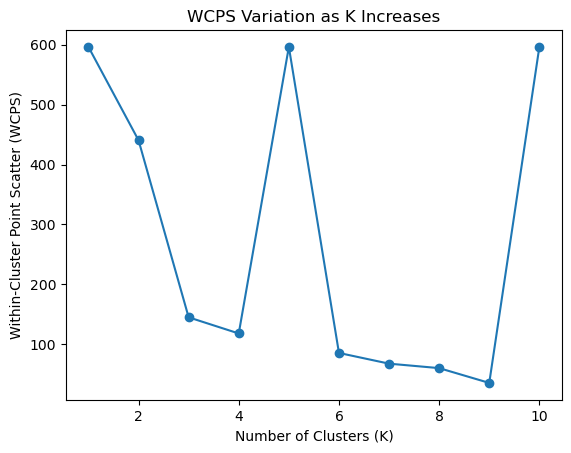

In [9]:
# K with a range
import matplotlib.pyplot as plt

# Assuming you have defined your distance function and other variables

# Determine the range of K values to test
k_range = range(1, 11)

# Initialize an array to store the Within-Cluster Point Scatter (WCPS) for each K
wcps_values = []

for K in k_range:
    # set initial centroids
    centroids = np.random.rand(K, X.shape[1]) * (np.max(X, axis=0) - np.min(X, axis=0)) + np.min(X, axis=0)
    
    cluster_labels = np.zeros(N, int)
    loss_difference_tolerance = 0.1
    loss_difference = np.inf
    loss_previous = np.inf

    while loss_difference > loss_difference_tolerance:
        for i in range(N):
            distances = [distance(X[i], centroid) for centroid in centroids]
            cluster_labels[i] = np.argmin(distances)

        new_centroids = np.array([np.mean(X[cluster_labels == k], axis=0) for k in range(K)])

        loss = 0
        for k in range(K):
            A = 0
            cluster_points = X[cluster_labels == k]
            for p in cluster_points:
                A += distance(p, centroids[k])
            loss += len(cluster_points) * A

        loss_difference = np.abs(loss - loss_previous)
        loss_previous = loss

        centroids = new_centroids

    # Calculate WCPS for the current K
    wcps = 0
    for k in range(K):
        cluster_points = X[cluster_labels == k]
        wcps += np.sum([distance(p, centroids[k]) for p in cluster_points])

    # Store the WCPS for the current K
    wcps_values.append(wcps)

    # Print or use the final centroids
    print(f"Final Centroids for K={K}:")
    print(centroids)

# Plot the WCPS as K increases
plt.plot(k_range, wcps_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Point Scatter (WCPS)')
plt.title('WCPS Variation as K Increases')
plt.show()


In [10]:
# prefer 4 clusters
# Convert Final_Centroids to a NumPy array
Final_Centroids = np.array([[15.18, 9.0],
                            [8.8375, 12.0625],
                            [9.62857143, 4.5],
                            [6.34, 4.88]])

# Assign each data point to the nearest centroid
cluster_labels = np.argmin(np.array([np.sum((X - centroid) ** 2, axis=1) for centroid in Final_Centroids]), axis=0)

# Initialize a list to store countries for each cluster
cluster_countries = [[] for _ in range(Final_Centroids.shape[0])]

# Populate the cluster_countries list
for i, country in enumerate(all_countries):
    cluster_countries[cluster_labels[i]].append(country)

# Print the cluster countries for K=4
for k, countries in enumerate(cluster_countries):
    print(f'Countries in Cluster {k + 1}:')
    print(countries)

Countries in Cluster 1:
['Belgium', 'France', 'Ireland', 'Switzerland', 'UK']
Countries in Cluster 2:
['Austria', 'Czechoslovakia', 'Denmark', 'E Germany', 'Hungary', 'Netherlands', 'Poland', 'W Germany']
Countries in Cluster 3:
['Albania', 'Finland', 'Greece', 'Italy', 'Norway', 'Sweden', 'USSR']
Countries in Cluster 4:
['Bulgaria', 'Portugal', 'Romania', 'Spain', 'Yugoslavia']


In [13]:
X_raw

array([[10.1,  1.4,  0.5,  8.9],
       [ 8.9, 14. ,  4.3, 19.9],
       [13.5,  9.3,  4.1, 17.5],
       [ 7.8,  6. ,  1.6,  8.3],
       [ 9.7, 11.4,  2.8, 12.5],
       [10.6, 10.8,  3.7, 25. ],
       [ 8.4, 11.6,  3.7, 11.1],
       [ 9.5,  4.9,  2.7, 33.7],
       [18. ,  9.9,  3.3, 19.5],
       [10.2,  3. ,  2.8, 17.6],
       [ 5.3, 12.4,  2.9,  9.7],
       [13.9, 10. ,  4.7, 25.8],
       [ 9. ,  5.1,  2.9, 13.7],
       [ 9.5, 13.6,  3.6, 23.4],
       [ 9.4,  4.7,  2.7, 23.3],
       [ 6.9, 10.2,  2.7, 19.3],
       [ 6.2,  3.7,  1.1,  4.9],
       [ 6.2,  6.3,  1.5, 11.1],
       [ 7.1,  3.4,  3.1,  8.6],
       [ 9.9,  7.8,  3.5, 24.7],
       [13.1, 10.1,  3.1, 23.8],
       [17.4,  5.7,  4.7, 20.6],
       [ 9.3,  4.6,  2.1, 16.6],
       [11.4, 12.5,  4.1, 18.8],
       [ 4.4,  5. ,  1.2,  9.5]])

In [21]:
sums = np.sum(X_raw, axis=1)
np.sort(sums)

array([15.9, 20.1, 20.9, 22.2, 23.7, 25.1, 30.3, 30.7, 32.6, 33.6, 34.8,
       36.4, 39.1, 40.1, 44.4, 45.9, 46.8, 47.1, 48.4, 50.1, 50.1, 50.1,
       50.7, 50.8, 54.4])

In [11]:
# full data
X = X_raw

Final Centroids for K=1:
[[ 9.828  7.896  2.936 17.112]]
Final Centroids for K=2:
[[ 7.80833333  6.15833333  2.18333333 11.04166667]
 [11.69230769  9.5         3.63076923 22.71538462]]
Final Centroids for K=3:
[[ 7.24444444  6.8         2.04444444  9.4       ]
 [ 8.96        5.52        2.64       18.1       ]
 [12.33636364  9.87272727  3.8        22.97272727]]
Final Centroids for K=4:
[[ 9.98571429  9.28571429  3.27142857 17.45714286]
 [15.6         8.925       3.95       22.425     ]
 [ 9.78        8.36        3.24       26.02      ]
 [ 7.16666667  6.1         2.05555556  9.53333333]]
Final Centroids for K=5:
[[   nan    nan    nan    nan]
 [   nan    nan    nan    nan]
 [ 9.828  7.896  2.936 17.112]
 [   nan    nan    nan    nan]
 [   nan    nan    nan    nan]]
Final Centroids for K=6:
[[11.7         7.45        3.7        29.75      ]
 [16.3         8.3         4.03333333 19.2       ]
 [ 7.8        11.8         3.13333333 11.1       ]
 [ 7.25714286  4.41428571  1.7         9.285714

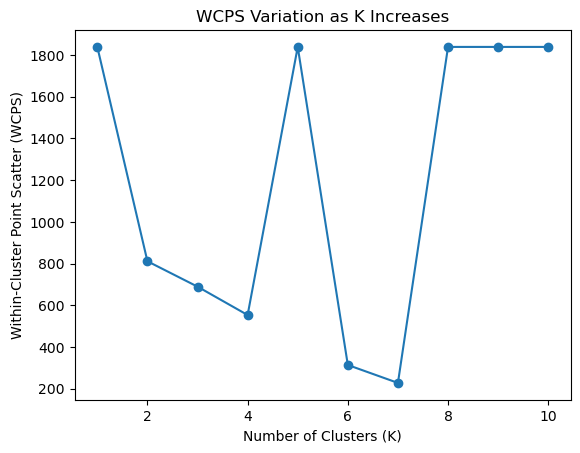

In [12]:
k_range = range(1, 11)

# Initialize an array to store the Within-Cluster Point Scatter (WCPS) for each K
wcps_values = []

for K in k_range:
    # set initial centroids
    centroids = np.random.rand(K, X.shape[1]) * (np.max(X, axis=0) - np.min(X, axis=0)) + np.min(X, axis=0)
    
    cluster_labels = np.zeros(N, int)
    loss_difference_tolerance = 0.1
    loss_difference = np.inf
    loss_previous = np.inf

    while loss_difference > loss_difference_tolerance:
        for i in range(N):
            distances = [distance(X[i], centroid) for centroid in centroids]
            cluster_labels[i] = np.argmin(distances)

        new_centroids = np.array([np.mean(X[cluster_labels == k], axis=0) for k in range(K)])

        loss = 0
        for k in range(K):
            A = 0
            cluster_points = X[cluster_labels == k]
            for p in cluster_points:
                A += distance(p, centroids[k])
            loss += len(cluster_points) * A

        loss_difference = np.abs(loss - loss_previous)
        loss_previous = loss

        centroids = new_centroids

    # Calculate WCPS for the current K
    wcps = 0
    for k in range(K):
        cluster_points = X[cluster_labels == k]
        wcps += np.sum([distance(p, centroids[k]) for p in cluster_points])

    # Store the WCPS for the current K
    wcps_values.append(wcps)

    # Print or use the final centroids
    print(f"Final Centroids for K={K}:")
    print(centroids)

# Plot the WCPS as K increases
plt.plot(k_range, wcps_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Point Scatter (WCPS)')
plt.title('WCPS Variation as K Increases')
plt.show()

In [23]:
# prefer 4 clusters
# Convert Final_Centroids to a NumPy array
Final_Centroids = np.array([[16.3        , 8.3      ,   4.03333333 ,19.2       ],
 [ 7.25714286 , 4.41428571 , 1.7       ,  9.28571429],
 [10.21666667 , 8.85      ,  3.33333333 ,22.65833333],
 [ 7.8      ,  11.8       ,  3.13333333 ,11.1       ]])

# Assign each data point to the nearest centroid
cluster_labels = np.argmin(np.array([np.sum((X - centroid) ** 2, axis=1) for centroid in Final_Centroids]), axis=0)

# Initialize a list to store countries for each cluster
cluster_countries = [[] for _ in range(Final_Centroids.shape[0])]

# Populate the cluster_countries list
for i, country in enumerate(all_countries):
    cluster_countries[cluster_labels[i]].append(country)

# Print the cluster countries for K=4
for k, countries in enumerate(cluster_countries):
    print(f'Countries in Cluster {k + 1}:')
    print(countries)

Countries in Cluster 1:
['Belgium', 'France', 'UK']
Countries in Cluster 2:
['Albania', 'Bulgaria', 'Italy', 'Portugal', 'Romania', 'Spain', 'Yugoslavia']
Countries in Cluster 3:
['Austria', 'Denmark', 'Finland', 'Greece', 'Ireland', 'Netherlands', 'Norway', 'Poland', 'Sweden', 'Switzerland', 'USSR', 'W Germany']
Countries in Cluster 4:
['Czechoslovakia', 'E Germany', 'Hungary']
